# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_pd = pd.DataFrame(cities)
cities_pd.columns = ["City"]

In [4]:
cities_pd["Cloudiness"] = ''
cities_pd["Country"] = ''
cities_pd["Date"] = ''
cities_pd["Humidity"] = ''
cities_pd["Lat"] = ''
cities_pd["Lon"] = ''
cities_pd["Max Temp"] = ''
cities_pd["Wind Speed"] = ''
cities_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,rikitea,,,,,,,,
1,punta arenas,,,,,,,,
2,severo-kurilsk,,,,,,,,
3,mercedes,,,,,,,,
4,snyder,,,,,,,,


In [5]:
for index, row in cities_pd.iterrows():
    city = row['City']
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{url}appid={api_key}&units={units}&q="
    print(f"Retreiving weather results for {city}.")
    response = requests.get(query_url + city).json()
    try:
        cities_pd.loc[index, "Cloudiness"] = response['clouds']['all']
        cities_pd.loc[index, "Country"] = response['sys']['country']
        cities_pd.loc[index, "Date"] = response['dt']
        cities_pd.loc[index, "Humidity"] = response['main']['humidity']
        cities_pd.loc[index, "Lat"] = response['coord']['lat']
        cities_pd.loc[index, "Lon"] = response['coord']['lon']
        cities_pd.loc[index, "Max Temp"] = response['main']['temp_max']
        cities_pd.loc[index, "Wind Speed"] = response['wind']['speed']
    except:
        print("City not found. Skipping...")

Retreiving weather results for rikitea.
Retreiving weather results for punta arenas.
Retreiving weather results for severo-kurilsk.
Retreiving weather results for mercedes.
Retreiving weather results for snyder.
Retreiving weather results for taolanaro.
City not found. Skipping...
Retreiving weather results for bluff.
Retreiving weather results for saint anthony.
Retreiving weather results for kyrksaeterora.
Retreiving weather results for ribeira grande.
Retreiving weather results for esperance.
Retreiving weather results for kota kinabalu.
Retreiving weather results for saint-augustin.
Retreiving weather results for qunduz.
City not found. Skipping...
Retreiving weather results for koeru.
Retreiving weather results for ushuaia.
Retreiving weather results for vaini.
Retreiving weather results for palabuhanratu.
City not found. Skipping...
Retreiving weather results for barabinsk.
Retreiving weather results for jamestown.
Retreiving weather results for nizhneyansk.
City not found. Skipp

Retreiving weather results for tasiilaq.
Retreiving weather results for arraial do cabo.
Retreiving weather results for dasoguz.
Retreiving weather results for noumea.
Retreiving weather results for sinnamary.
Retreiving weather results for eagle pass.
Retreiving weather results for samusu.
City not found. Skipping...
Retreiving weather results for naze.
Retreiving weather results for belushya guba.
City not found. Skipping...
Retreiving weather results for whyalla.
Retreiving weather results for mosquera.
Retreiving weather results for bambous virieux.
Retreiving weather results for tautira.
Retreiving weather results for hambantota.
Retreiving weather results for megion.
Retreiving weather results for victoria.
Retreiving weather results for luderitz.
Retreiving weather results for isangel.
Retreiving weather results for palakollu.
Retreiving weather results for krasnoselkup.
City not found. Skipping...
Retreiving weather results for varna.
Retreiving weather results for yuancheng.
C

Retreiving weather results for olafsvik.
City not found. Skipping...
Retreiving weather results for cidreira.
Retreiving weather results for andros town.
Retreiving weather results for bonavista.
Retreiving weather results for jinchang.
Retreiving weather results for nhulunbuy.
Retreiving weather results for loveland.
Retreiving weather results for bargal.
City not found. Skipping...
Retreiving weather results for amderma.
City not found. Skipping...
Retreiving weather results for lira.
Retreiving weather results for copiapo.
Retreiving weather results for mitchell.
Retreiving weather results for yulara.
Retreiving weather results for rawson.
Retreiving weather results for shizukuishi.
Retreiving weather results for astorga.
Retreiving weather results for avera.
Retreiving weather results for roros.
Retreiving weather results for eureka.
Retreiving weather results for toamasina.
Retreiving weather results for kysyl-syr.
Retreiving weather results for marsa matruh.
Retreiving weather re

Retreiving weather results for malpe.
Retreiving weather results for bandarbeyla.
Retreiving weather results for khorinsk.
Retreiving weather results for kiama.
Retreiving weather results for tumannyy.
City not found. Skipping...
Retreiving weather results for udachnyy.
Retreiving weather results for tabory.
Retreiving weather results for saleaula.
City not found. Skipping...
Retreiving weather results for okha.
Retreiving weather results for stare mesto.
Retreiving weather results for assiniboia.
Retreiving weather results for tiarei.
Retreiving weather results for kavaratti.
Retreiving weather results for yilan.
Retreiving weather results for nakamura.
Retreiving weather results for powell river.
Retreiving weather results for bengkulu.
City not found. Skipping...
Retreiving weather results for bani.
Retreiving weather results for lamu.
Retreiving weather results for okhotsk.
Retreiving weather results for juba.
Retreiving weather results for hualmay.
Retreiving weather results for a

In [20]:
cities_pd

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,rikitea,80.0,PF,1554645512,100.0,-23.12,-134.97,76.89,8.63
1,punta arenas,0.0,CL,1554644547,56.0,-53.16,-70.91,42.80,8.05
2,severo-kurilsk,88.0,RU,1554645506,95.0,50.68,156.12,32.52,18.70
3,mercedes,0.0,UY,1554645912,64.0,-33.25,-58.03,71.76,4.50
4,snyder,1.0,US,1554645674,81.0,32.72,-100.92,63.00,6.93
5,taolanaro,NaN,,,NaN,NaN,,NaN,NaN
6,bluff,0.0,AU,1554645524,65.0,-23.58,149.07,66.81,8.30
7,saint anthony,90.0,US,1554645307,81.0,43.97,-111.68,42.80,13.87
8,kyrksaeterora,75.0,NO,1554645645,55.0,63.29,9.09,41.00,20.80
9,ribeira grande,20.0,PT,1554643800,48.0,38.52,-28.7,60.80,21.92


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
cities_pd.to_csv(output_data_file)

In [22]:
cities_pd["Cloudiness"] = pd.to_numeric(cities_pd["Cloudiness"])
cities_pd["Humidity"] = pd.to_numeric(cities_pd["Humidity"])
cities_pd["Lat"] = pd.to_numeric(cities_pd["Lat"])
cities_pd["Max Temp"] = pd.to_numeric(cities_pd["Max Temp"])
cities_pd["Wind Speed"] = pd.to_numeric(cities_pd["Wind Speed"])

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

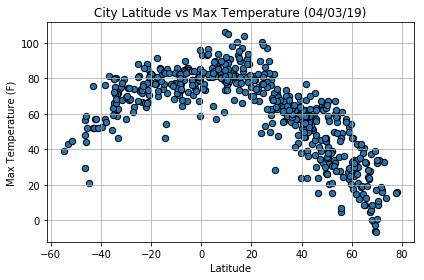

In [25]:
cities_pd.plot(kind="scatter", x="Lat", y="Max Temp", s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Max Temperature (04/03/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.tight_layout()

#### Latitude vs. Humidity Plot

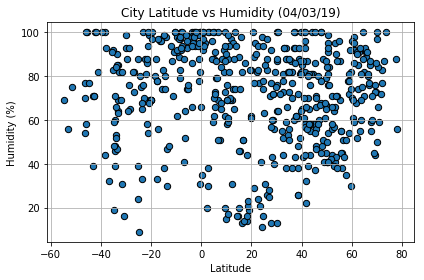

In [27]:
cities_pd.plot(kind="scatter", x="Lat", y="Humidity", s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Humidity (04/03/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.tight_layout()

#### Latitude vs. Cloudiness Plot

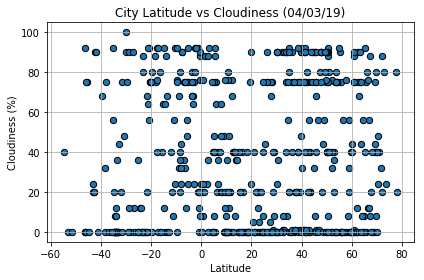

In [28]:
cities_pd.plot(kind="scatter", x="Lat", y="Cloudiness", s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Cloudiness (04/03/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.tight_layout()

#### Latitude vs. Wind Speed Plot

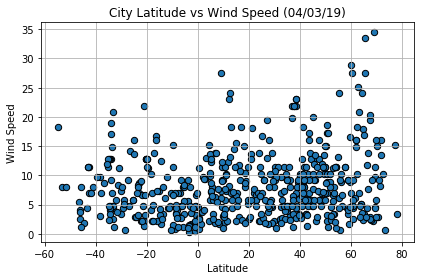

In [29]:
cities_pd.plot(kind="scatter", x="Lat", y="Wind Speed", s=40, grid="True", edgecolors="black")
plt.title("City Latitude vs Wind Speed (04/03/19)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.tight_layout()